In [32]:
# disable warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

## Dummy dataset

In [4]:
df = pd.read_csv('../data/train.csv')

In [5]:
df.head()

,id,y,age,job,marital,education,default,housing,loan,contact,...,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,36,blue-collar,married,basic.9y,unknown,no,no,telephone,...,2,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0
1,1,0,34,technician,married,professional.course,no,yes,no,cellular,...,4,3,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1
2,2,0,28,student,single,university.degree,unknown,yes,no,cellular,...,4,2,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1
3,3,0,36,technician,single,high.school,no,yes,no,cellular,...,4,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1
4,4,0,53,blue-collar,married,unknown,unknown,yes,no,cellular,...,5,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1


In [6]:
data = df[['month', 'campaign', 'previous', 'marital', 'job']]

In [7]:
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BicScore

# create some data with dependencies
# data = pd.DataFrame(np.random.randint(0, 3, size=(2500, 8)), columns=list('ABCDEFGH'))
# data['A'] += data['B'] + data['C']
# data['H'] = data['G'] - data['A']

hc = HillClimbSearch(data, scoring_method=BicScore(data))
best_model = hc.estimate()
print(best_model.edges())

[('month', 'job'), ('previous', 'month'), ('job', 'marital')]


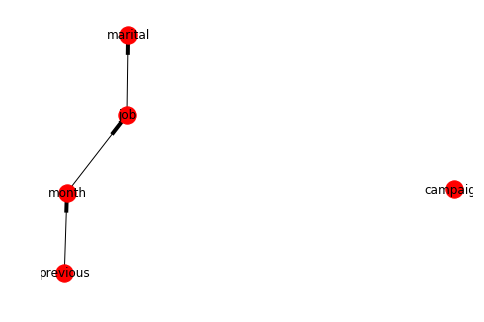

In [8]:
nx.draw(best_model, with_labels=True, pos=graphviz_layout(best_model))
plt.show()

## Credit Card Fraud

In [40]:
df = pd.read_csv('../data/171003_df_cleansed.csv')

In [41]:
print(df.shape)
print(df[df['fraudulent'] == 1].shape)

(15487, 126)
(423, 126)


#### Process data

In [85]:
pd.options.display.max_rows = 4000

In [86]:
df.head(1).T

,0
id,4552758
fraudulent,False
account_id,NaN
analysis_blacklisted,NaN
analysis_score,NaN
buyer_age_of_first_analysis_in_days,NaN
buyer_consecutive_immediate_departure_sales,NaN
buyer_credit_limit,0
buyer_dormancy_in_days,NaN
buyer_identification,17575183000176


In [92]:
df['credit_card_holder_and_passenger_similarity_cat'] = pd.cut(df['credit_card_holder_and_passenger_similarity'], bins=6, include_lowest=True)

In [93]:
df['credit_card_min_age_in_days_cat'] = pd.cut(df['credit_card_min_age_in_days'], bins=20, include_lowest=True)

In [94]:
df['flight_price_per_passenger_cat'] = pd.cut(df['flight_price_per_passenger'], bins=30, include_lowest=True)

In [95]:
df['credit_card_min_sales_count_cat'] =  pd.cut(df['credit_card_min_sales_count'], bins=20, include_lowest=True)

In [96]:
df['credit_card_max_sales_count_24h_cat'] =  pd.cut(df['credit_card_max_sales_count_24h'], bins=20, include_lowest=True)

In [97]:
df['flight_hours_to_departure_cat'] =  pd.cut(df['flight_hours_to_departure'], bins=20, include_lowest=True)

In [98]:
df['credit_card_holder_diff_cat'] =  pd.cut(df['credit_card_holder_diff'], bins=5, include_lowest=True)

In [99]:
df['credit_card_last_names_association_count_cat'] = pd.cut(df['credit_card_last_names_association_count'], bins=5, include_lowest=True)

In [106]:
df["flight_origin_destination_iata"] = df["flight_origin_iata"] + df["flight_destination_iata"]

In [102]:
df.credit_card_holder_and_passenger_similarity_cat.unique()

[(0.333, 0.667], (-0.333, 0], (0, 0.333], (0.667, 1], [-1.002, -0.667]]
Categories (5, object): [[-1.002, -0.667] < (-0.333, 0] < (0, 0.333] < (0.333, 0.667] < (0.667, 1]]

In [117]:
#filter features
# data = df[[
#     'credit_card_holder_and_passenger_similarity',
#     'credit_card_min_age_in_days',
#     'flight_price_per_passenger',
#     'credit_card_min_sales_count',
#     'credit_card_max_sales_count_24h',
#     'flight_hours_to_departure',
#     'credit_card_holder_diff',
#     'credit_card_last_names_association_count',
#     'fraudulent'
# ]]


#filter features
data = df[[
    'credit_card_holder_and_passenger_similarity_cat',
    'credit_card_min_age_in_days_cat',
    'flight_price_per_passenger_cat',
    'credit_card_min_sales_count_cat',
    'credit_card_max_sales_count_24h_cat',
    'flight_hours_to_departure_cat',
    'credit_card_holder_diff_cat',
    'credit_card_last_names_association_count_cat',
    'flight_origin_destination_iata',
    'payment_attempts_count',
    'fraudulent',
    'flight_international'
]]


In [118]:
hc = HillClimbSearch(data, scoring_method=BicScore(data))
best_model = hc.estimate()
print(best_model.edges())

[('credit_card_holder_and_passenger_similarity_cat', 'credit_card_holder_diff_cat'), ('credit_card_holder_and_passenger_similarity_cat', 'credit_card_last_names_association_count_cat'), ('credit_card_holder_and_passenger_similarity_cat', 'credit_card_max_sales_count_24h_cat'), ('credit_card_holder_and_passenger_similarity_cat', 'credit_card_min_age_in_days_cat'), ('credit_card_holder_and_passenger_similarity_cat', 'credit_card_min_sales_count_cat'), ('flight_hours_to_departure_cat', 'flight_international'), ('flight_international', 'credit_card_holder_and_passenger_similarity_cat'), ('flight_international', 'payment_attempts_count'), ('flight_international', 'flight_price_per_passenger_cat'), ('fraudulent', 'credit_card_holder_and_passenger_similarity_cat'), ('fraudulent', 'flight_hours_to_departure_cat'), ('fraudulent', 'payment_attempts_count')]


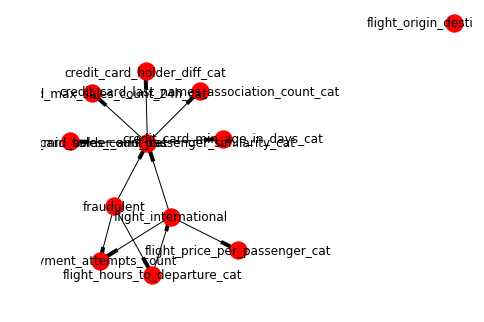

In [119]:
nx.draw(best_model, with_labels=True, pos=graphviz_layout(best_model))
plt.show()

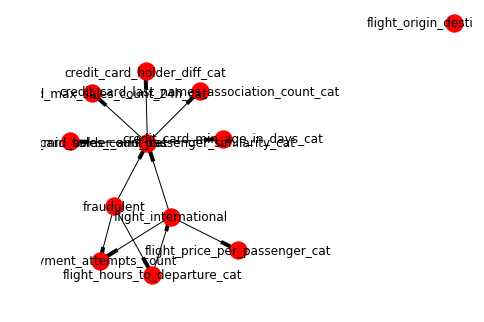